In [2]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.describe()

,math score,reading score,writing score
count,994.000000,994.000000,994.000000
mean,66.081489,69.137827,68.094567
std,15.172668,14.603732,15.182844
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [3]:
df['math score'].fillna(66.081489, inplace = True)
df['reading score'].fillna(69.137827, inplace = True)
df['writing score'].fillna(68.094567, inplace = True)

In [4]:
import numpy as np
maths = np.array(df['math score'])
reading = np.array(df['reading score'])
writing = np.array(df['writing score'])

<AxesSubplot: >

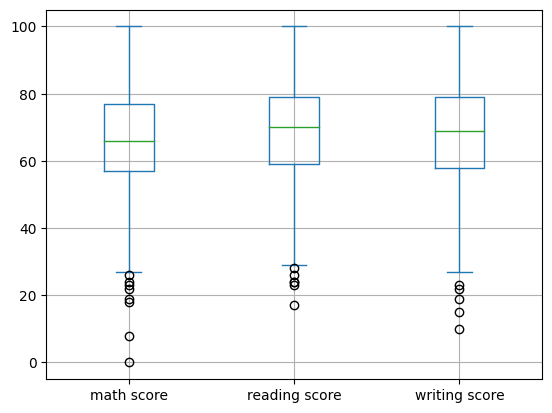

In [5]:
df.plot.box(grid = True)

In [6]:
def inter_quantile(col):
    outliers = []
    filtered = []
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + (1.5 * IQR)
    lower_range = Q1 - (1.5 * IQR)
    for i in col:
        if i > lower_range and i < upper_range:
            filtered.append(i)
        else:
            outliers.append(i)
    return filtered
    print(outliers)

In [7]:
o1 = inter_quantile(df['math score'])
o2 = inter_quantile(df['reading score'])
o3 = inter_quantile(df['writing score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d718886ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d718887010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d718886830>],
 'medians': [<matplotlib.lines.Line2D at 0x1d718887430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7188876d0>],
 'means': []}

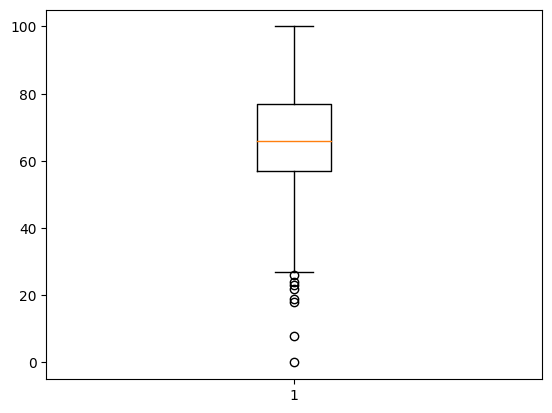

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(df['math score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7188c56f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7188c5c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7188c5450>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7188c6170>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7188c6410>],
 'means': []}

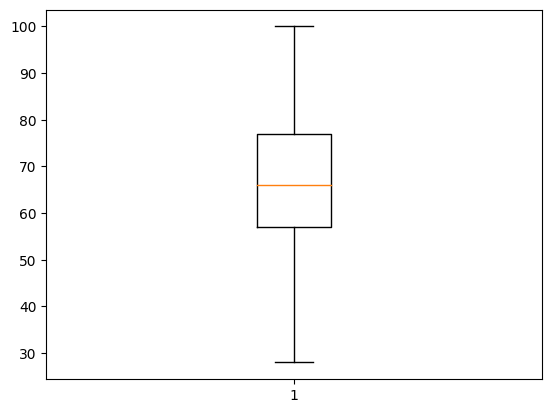

In [12]:
plt.boxplot(o1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d71889dae0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7189217e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7188c72b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d718921d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d718921fc0>],
 'means': []}

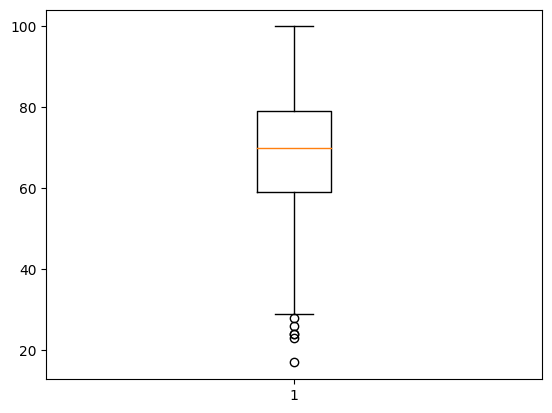

In [13]:
plt.boxplot(df['reading score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d71aab76a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d71aab7be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d71aab7400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d71aaec160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d71aaec400>],
 'means': []}

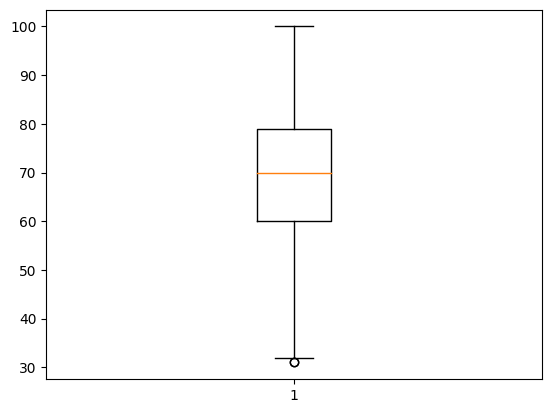

In [14]:
plt.boxplot(o2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d71ab2f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d71ab2faf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d71ab2f310>],
 'medians': [<matplotlib.lines.Line2D at 0x1d71894f820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d71ab2fd60>],
 'means': []}

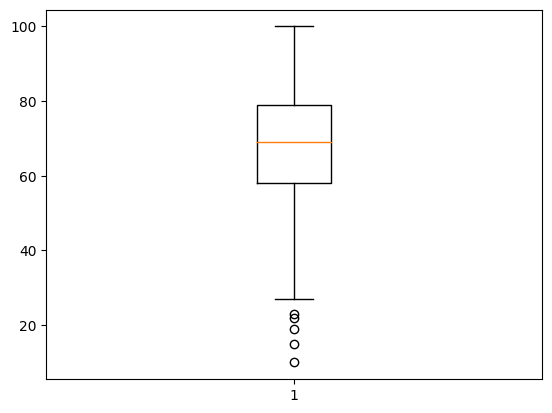

In [15]:
plt.boxplot(df['writing score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d71bbc54b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d71bbc59f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d71bbc5330>],
 'medians': [<matplotlib.lines.Line2D at 0x1d71bbc5f30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d71bbc61d0>],
 'means': []}

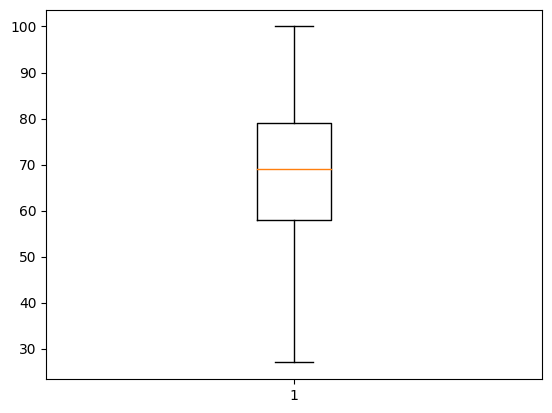

In [16]:
plt.boxplot(o3)

In [48]:
#Z- Score method
from scipy import stats
def z_score(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 3
    outlier = []
    op = []
    for i in col:
        z = (i-mean)/std
        z = abs(z)
        if z > threshold:
            outlier.append(i)
        else:
            op.append(i)
    return op
    print('outlier in dataset is', outlier)

In [49]:
o1 = z_score(maths)
o2 = z_score(reading)
o3 = z_score(writing)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d71c3d4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d71c3d5210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d71c3d4a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d71c3d5750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d71c3d59f0>],
 'means': []}

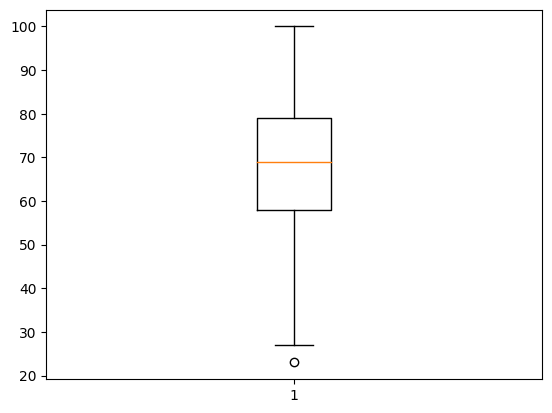

In [53]:
plt.boxplot(o3)